##### Copyright 2019 The TensorFlow Authors.

In [309]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

# TensorFlow 2 quickstart for beginners

<table class="tfo-notebook-buttons" align="left">
  <td>
    <a target="_blank" href="https://www.tensorflow.org/tutorials/quickstart/beginner"><img src="https://www.tensorflow.org/images/tf_logo_32px.png" />View on TensorFlow.org</a>
  </td>
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/tensorflow/docs/blob/master/site/en/tutorials/quickstart/beginner.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Run in Google Colab</a>
  </td>
  <td>
    <a target="_blank" href="https://github.com/tensorflow/docs/blob/master/site/en/tutorials/quickstart/beginner.ipynb"><img src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" />View source on GitHub</a>
  </td>
  <td>
    <a href="https://storage.googleapis.com/tensorflow_docs/docs/site/en/tutorials/quickstart/beginner.ipynb"><img src="https://www.tensorflow.org/images/download_logo_32px.png" />Download notebook</a>
  </td>
</table>

This short introduction uses [Keras](https://www.tensorflow.org/guide/keras/overview) to:

1. Load a prebuilt dataset.
1. Build a neural network machine learning model that classifies images.
2. Train this neural network.
3. Evaluate the accuracy of the model.

This tutorial is a [Google Colaboratory](https://colab.research.google.com/notebooks/welcome.ipynb) notebook. Python programs are run directly in the browser—a great way to learn and use TensorFlow. To follow this tutorial, run the notebook in Google Colab by clicking the button at the top of this page.

1. In Colab, connect to a Python runtime: At the top-right of the menu bar, select *CONNECT*.
2. Run all the notebook code cells: Select *Runtime* > *Run all*.

## Set up TensorFlow

Import TensorFlow into your program to get started:

In [399]:
import tensorflow as tf
print("TensorFlow version:", tf.__version__)
import numpy as np
import matplotlib.pyplot as plt

TensorFlow version: 2.3.1


If you are following along in your own development environment, rather than [Colab](https://colab.research.google.com/github/tensorflow/docs/blob/master/site/en/tutorials/quickstart/beginner.ipynb), see the [install guide](https://www.tensorflow.org/install) for setting up TensorFlow for development.

Note: Make sure you have upgraded to the latest `pip` to install the TensorFlow 2 package if you are using your own development environment. See the [install guide](https://www.tensorflow.org/install) for details.

## Load a dataset

Load and prepare the [MNIST dataset](http://yann.lecun.com/exdb/mnist/). Convert the sample data from integers to floating-point numbers:

In [400]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

## Build a machine learning model

Build a `tf.keras.Sequential` model by stacking layers.

In [401]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(300, activation='relu'),
  #tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10)
])

For each example, the model returns a vector of [logits](https://developers.google.com/machine-learning/glossary#logits) or [log-odds](https://developers.google.com/machine-learning/glossary#log-odds) scores, one for each class.

In [402]:
predictions = model(x_train[:1]).numpy()
predictions

array([[ 0.19320454, -0.11093343, -0.6310457 ,  0.60094416,  0.59626466,
        -0.30516618, -0.21425082, -0.6464088 , -0.5588223 ,  0.13138093]],
      dtype=float32)

The `tf.nn.softmax` function converts these logits to *probabilities* for each class: 

In [403]:
tf.nn.softmax(predictions).numpy()

array([[0.12059333, 0.08896882, 0.05288785, 0.18130189, 0.18045546,
        0.07326282, 0.0802357 , 0.05208154, 0.05684891, 0.11336359]],
      dtype=float32)

Note: It is possible to bake the `tf.nn.softmax` function into the activation function for the last layer of the network. While this can make the model output more directly interpretable, this approach is discouraged as it's impossible to provide an exact and numerically stable loss calculation for all models when using a softmax output. 

Define a loss function for training using `losses.SparseCategoricalCrossentropy`, which takes a vector of logits and a `True` index and returns a scalar loss for each example.

In [404]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

This loss is equal to the negative log probability of the true class: The loss is zero if the model is sure of the correct class.

This untrained model gives probabilities close to random (1/10 for each class), so the initial loss should be close to `-tf.math.log(1/10) ~= 2.3`.

In [405]:
loss_fn(y_train[:1], predictions).numpy()

2.613702

Before you start training, configure and compile the model using Keras `Model.compile`. Set the [`optimizer`](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers) class to `adam`, set the `loss` to the `loss_fn` function you defined earlier, and specify a metric to be evaluated for the model by setting the `metrics` parameter to `accuracy`.

In [406]:
model.compile(optimizer='adam',
              loss=loss_fn,
              metrics=['accuracy'])

## Train and evaluate your model

Use the `Model.fit` method to adjust your model parameters and minimize the loss: 

In [407]:
model.fit(x_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2170 - accuracy: 0.9372
Epoch 2/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0894 - accuracy: 0.9726
Epoch 3/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0589 - accuracy: 0.9819
Epoch 4/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0425 - accuracy: 0.9865
Epoch 5/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0306 - accuracy: 0.9902


The `Model.evaluate` method checks the models performance, usually on a "[Validation-set](https://developers.google.com/machine-learning/glossary#validation-set)" or "[Test-set](https://developers.google.com/machine-learning/glossary#test-set)".

In [408]:
model.evaluate(x_test,  y_test, verbose=2)

313/313 - 0s - loss: 0.0685 - accuracy: 0.9784


[0.06852751225233078, 0.9783999919891357]

The image classifier is now trained to ~98% accuracy on this dataset. To learn more, read the [TensorFlow tutorials](https://www.tensorflow.org/tutorials/).

If you want your model to return a probability, you can wrap the trained model, and attach the softmax to it:

In [409]:
probability_model = tf.keras.Sequential([
  model,
  tf.keras.layers.Softmax()
])

In [410]:
probability_model(x_test[:5])

<tf.Tensor: shape=(5, 10), dtype=float32, numpy=
array([[3.1039153e-07, 5.0531406e-09, 1.6449246e-07, 7.5561006e-04,
        7.2935468e-12, 6.2293783e-09, 4.4729674e-13, 9.9923766e-01,
        4.3336069e-08, 6.2518429e-06],
       [1.4112302e-10, 4.1540434e-06, 9.9999583e-01, 2.2670650e-09,
        1.4060282e-18, 5.6860049e-08, 8.8643670e-10, 5.2419051e-14,
        2.3753379e-09, 1.0185726e-14],
       [1.8561110e-07, 9.9903595e-01, 1.0527466e-04, 5.4193879e-06,
        3.7824113e-06, 1.5467122e-05, 2.0442259e-05, 6.1917980e-04,
        1.9418914e-04, 1.1037630e-07],
       [9.9997950e-01, 3.5114158e-09, 3.8349194e-07, 1.7643310e-09,
        6.8924638e-10, 8.8747163e-07, 1.8505785e-05, 4.1877516e-07,
        1.5388205e-10, 3.1123693e-07],
       [1.9817459e-07, 9.0365571e-10, 3.8237496e-07, 2.9904184e-09,
        9.9947459e-01, 1.4256260e-08, 1.2544761e-07, 1.3908914e-05,
        6.1666390e-07, 5.1016751e-04]], dtype=float32)>

## Conclusion

Congratulations! You have trained a machine learning model using a prebuilt dataset using the [Keras](https://www.tensorflow.org/guide/keras/overview) API.

For more examples of using Keras, check out the [tutorials](https://www.tensorflow.org/tutorials/keras/). To learn more about building models with Keras, read the [guides](https://www.tensorflow.org/guide/keras). If you want learn more about loading and preparing data, see the tutorials on [image data loading](https://www.tensorflow.org/tutorials/load_data/images) or [CSV data loading](https://www.tensorflow.org/tutorials/load_data/csv).


# FGSM based untargeted attacks

Assume the network assigns an image $x$ with the lable $y$, 

$y = \text{classifier}(x)$. 

For an untargeted attacks the adversary is seeking to produce an image $x'$ which is different from $x$ such that applying $\text{classifier}(x')$ to this image we obtain a label $y'$ which is different from the original label $y$, i.e. $y'=\text{classifier}(x')\neq y$. The modification to image $x$ should be imperceptable, i.e. less than some constrain $\delta$:

$\|x-x'\|<\delta$.

The larger the $\delta$ the more noticeable the modification is, but attackers's objective is achieved more easily, and vice versa -- smaller $\delta$ assumes less tolerance to the modification.

Fast Gradient Sign Method allows the attacker to modify an image by taking a single step in the loss function gradient direction (for non-targeted attacks), taking into account the sign of the gradient:

$x' \leftarrow \text{clip}\left(x+\epsilon\text{sign}\left(\nabla l_{F,y^*}(x)\right)\right)$

where $\epsilon$ is a small constraint value,$l$ is the lost function and $\text{clip}()$ function brings all the pixels of the image to the same range, e.g. from 0 to 255.

The attackers goal is to increase the value of $l_{F,y^*}(x)$, where $x$ image, $F$--network and $y^*= F(x)$ -- the ground-truth label, i.e. the attacker is interested to producing any label $y'$ which is different of $y^*$. This is achieved by increasing the loss $l_{F,y^*}(x)$. He computes the sign of the gradient of loss functoin and makes a step along the gradient direction. The "length" of the step is controlled by $\epsilon$.

We will be applying the FGSM based untargeted attack using images from the test set on the baseline DNN. 

In [165]:
# number of images in the test set:
print("The number of images in the test set is %d. "%(x_test.shape[0]))

The number of images in the test set is 10000. 


In [166]:
# predict test set images labels
yhat = model.predict_classes(x_test)
yhat.shape

(10000,)

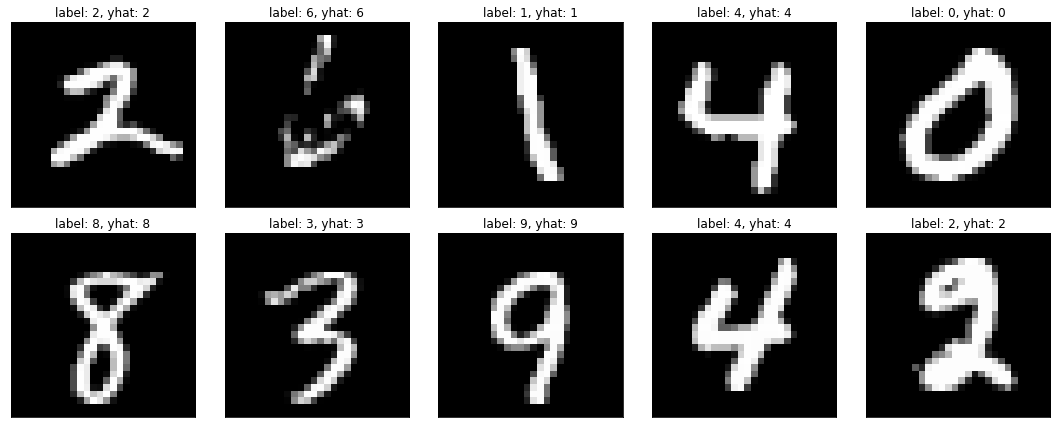

In [167]:
# plotting some images from the test set (see https://mrdatascience.com/how-to-plot-mnist-digits-using-matplotlib/)
num = 10
np.random.seed(45)
randIdx = [np.random.randint(10000) for i in range(num)]
num_row = 2
num_col = 5# plot images
fig, axes = plt.subplots(num_row, num_col, figsize=(3*num_col,3*num_row))
for i in range(num):
    ax = axes[i//num_col, i%num_col]
    ax.imshow(x_test[randIdx[i]], cmap='gray')
    ax.set_title('label: {}, yhat: {}'.format(y_test[randIdx[i]],yhat[randIdx[i]]))
    ax.set_xticks([])
    ax.set_yticks([])
plt.tight_layout()
plt.show()

In [179]:
# the attack

# loss function is loss_fn

# TensorFlow allows to calculate gradients immediately:
# https://stackoverflow.com/questions/35226428/how-do-i-get-the-gradient-of-the-loss-at-a-tensorflow-variable
# To activate the depricated tensorflow gradients use
# tf.compat.v1.enable_eager_execution()#https://stackoverflow.com/questions/66221788/tf-gradients-is-not-supported-when-eager-execution-is-enabled-use-tf-gradientta
# did not work on my local machine

# tf.GradientTape allows us to track TensorFlow computations and calculate gradients w.r.t. some given variables
# https://medium.com/analytics-vidhya/tf-gradienttape-explained-for-keras-users-cc3f06276f22
predictions = model(x_test).numpy()
lossArray=[loss_fn(y_test[:i], predictions[:i]).numpy() for i in range(y_test.shape[0])]
print(len(lossArray))
    

10000


[ 2.4079987e-05  2.6948267e-04  2.0122874e-04 ... -7.0035458e-06
 -7.0035458e-06 -7.0035458e-06]
(10000,)


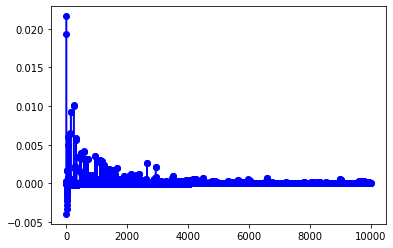

In [181]:
lossGradientsArray= np.gradient(lossArray)
print(lossGradientsArray)
print(lossGradientsArray.shape)
plt.plot(lossGradientsArray,'bo-');

In [182]:
# create an array of 10000 modified test images
epsilon = 20/255
x_test_modified = np.zeros(x_test.shape)
for i in range(x_test.shape[0]):
    x_test_modified[i,:,:] = np.clip(x_test[i]+epsilon*np.sign(lossGradientsArray[i]), 0.0, 1.0) 

print(x_test_modified.shape)

(10000, 28, 28)


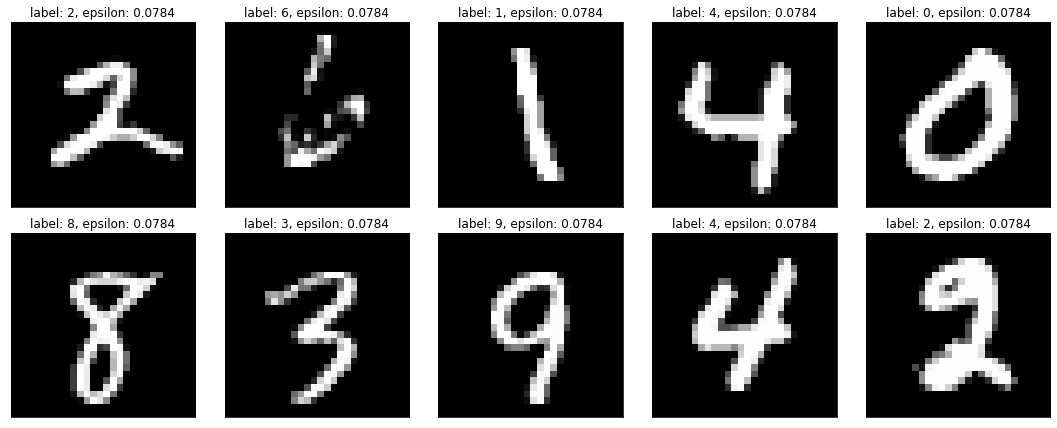

In [183]:
# plot
num = 10
np.random.seed(45)
randIdx = [np.random.randint(10000) for i in range(num)]
num_row = 2
num_col = 5# plot images
fig, axes = plt.subplots(num_row, num_col, figsize=(3*num_col,3*num_row))
for i in range(num):
    ax = axes[i//num_col, i%num_col]
    ax.imshow(x_test_modified[randIdx[i]], cmap='gray')
    ax.set_title('label: {}, epsilon: {:.4f}'.format(y_test[randIdx[i]], epsilon))
    ax.set_xticks([])
    ax.set_yticks([])
plt.tight_layout()
plt.show()

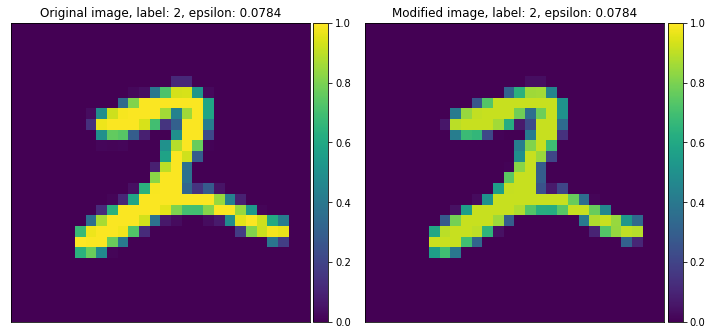

In [221]:
# plot randomly selected modified and original images side-by-side
from mpl_toolkits.axes_grid1 import make_axes_locatable

num = 10
np.random.seed(45)
randIdx = [np.random.randint(10000) for i in range(num)]
fig, axes = plt.subplots(1, 2, figsize=(10,20))
divider1 = make_axes_locatable(axes[0])
divider2 = make_axes_locatable(axes[1])
im1  =  axes[0].imshow(x_test[randIdx[0]])
im2  =  axes[1].imshow(x_test_modified[randIdx[0]])
axes[0].set_title('Original image, label: {}, epsilon: {:.4f}'.format(y_test[randIdx[0]], epsilon))
axes[1].set_title('Modified image, label: {}, epsilon: {:.4f}'.format(y_test[randIdx[0]], epsilon))
axes[0].set_xticks([])
axes[0].set_yticks([])
axes[1].set_xticks([])
axes[1].set_yticks([])

cax1 = divider1.append_axes('right', size='5%', pad=0.05)
cax2 = divider2.append_axes('right', size='5%', pad=0.05)
im1.set_clim(0, 1)
im2.set_clim(0, 1)
fig.colorbar(im1, cax=cax1, orientation='vertical')
fig.colorbar(im2, cax=cax2, orientation='vertical')
plt.tight_layout()
plt.show()


In [222]:
# now perform an attack
model.evaluate(x_test_modified,  y_test, verbose=2)
model.evaluate(x_test,  y_test, verbose=2)

313/313 - 0s - loss: 0.0960 - accuracy: 0.9720
313/313 - 0s - loss: 0.0700 - accuracy: 0.9788


[0.0700332522392273, 0.9787999987602234]

## Another way to calculate gradients using tf.GradientTape

In [299]:
################################################################################################################
# Using tf.GradientTape:
################################################################################################################

# loss function is loss_fn

#tf.GradientTape allows us to track TensorFlow computations and calculate gradients w.r.t. some given variables
#https://medium.com/analytics-vidhya/tf-gradienttape-explained-for-keras-users-cc3f06276f22
#https://www.tensorflow.org/api_docs/python/tf/GradientTape?hl=hu

x_test_tensor = tf.convert_to_tensor(x_test, dtype=tf.float32)
with tf.GradientTape() as g:
    g.watch(x_test_tensor)
    lossTensor = loss_fn(y_test, model(x_test_tensor))
    
# calculate gradients of loss function:
lossGradientsTensor = g.gradient(lossTensor, x_test_tensor)

print(lossGradientsTensor.shape)

(10000, 28, 28)


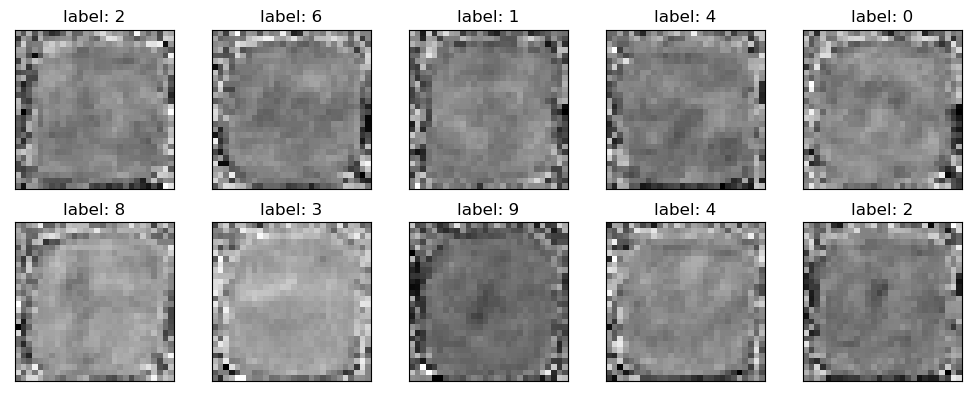

In [300]:
# plot image "gradients":
num = 10
np.random.seed(45)
randIdx = [np.random.randint(10000) for i in range(num)]
num_row = 2
num_col = 5# plot images
fig, axes = plt.subplots(num_row, num_col, figsize=(2*num_col,2*num_row))
for i in range(num):
    ax = axes[i//num_col, i%num_col]
    ax.imshow(lossGradientsTensor[randIdx[i]], cmap='gray')
    ax.set_title('label: {}'.format(y_test[randIdx[i]]))
    ax.set_xticks([])
    ax.set_yticks([])
plt.tight_layout()
plt.show()

In [301]:
# create an array of 10000 modified test images
epsilon = 20/255
x_test_modified_v1 = np.zeros(x_test.shape)
for i in range(x_test.shape[0]):
    x_test_modified_v1[i,:,:] = np.clip(x_test[i]+epsilon*np.sign(lossGradientsTensor[i,:,:]), 0.0, 1.0) 

print(x_test_modified_v1.shape)

(10000, 28, 28)


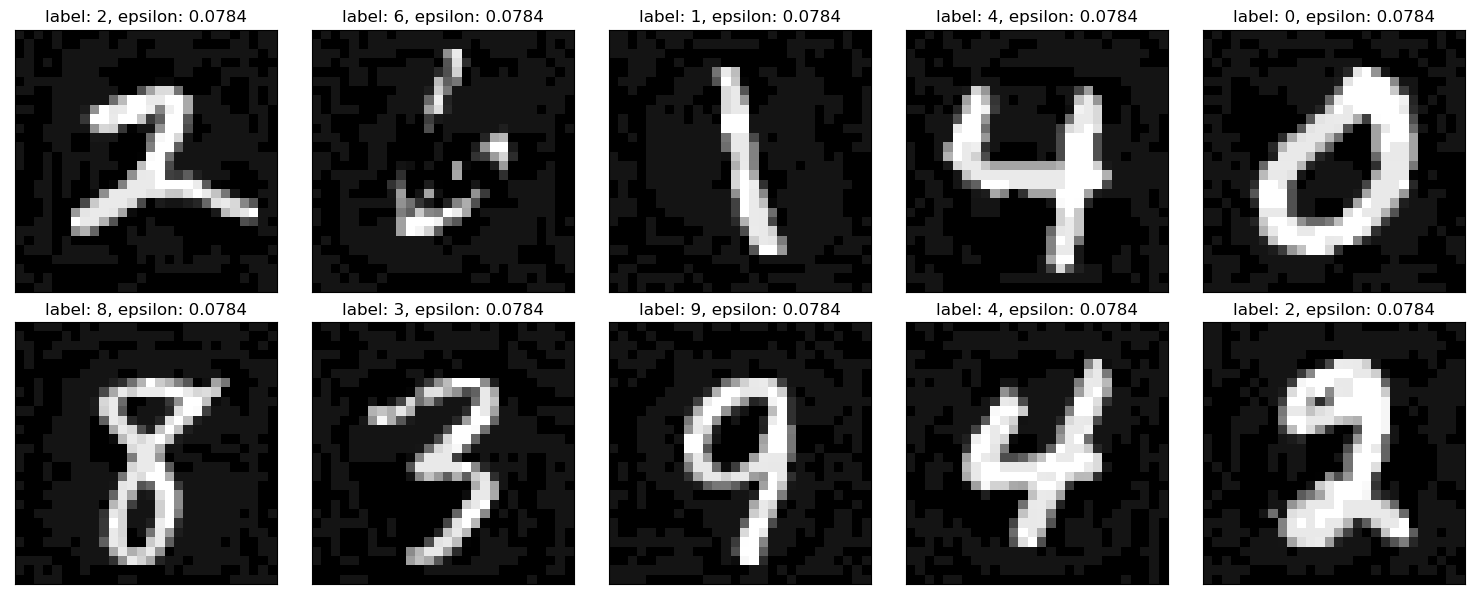

In [302]:
# plot
num = 10
np.random.seed(45)
randIdx = [np.random.randint(10000) for i in range(num)]
num_row = 2
num_col = 5# plot images
fig, axes = plt.subplots(num_row, num_col, figsize=(3*num_col,3*num_row))
for i in range(num):
    ax = axes[i//num_col, i%num_col]
    ax.imshow(x_test_modified_v1[randIdx[i]], cmap='gray')
    ax.set_title('label: {}, epsilon: {:.4f}'.format(y_test[randIdx[i]], epsilon))
    ax.set_xticks([])
    ax.set_yticks([])
plt.tight_layout()
plt.show()

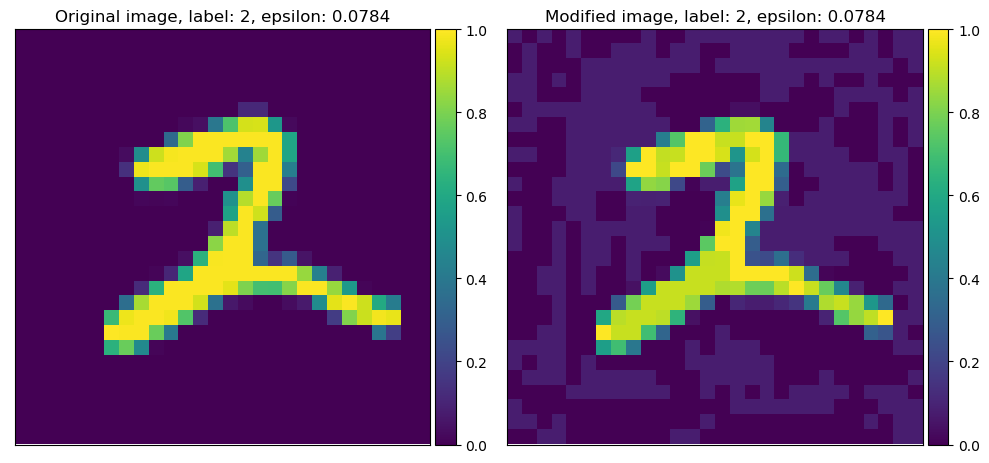

In [303]:
# plot randomly selected modified and original images side-by-side
from mpl_toolkits.axes_grid1 import make_axes_locatable

num = 10
np.random.seed(45)
randIdx = [np.random.randint(10000) for i in range(num)]
fig, axes = plt.subplots(1, 2, figsize=(10,20))
divider1 = make_axes_locatable(axes[0])
divider2 = make_axes_locatable(axes[1])
im1  =  axes[0].imshow(x_test[randIdx[0]])
im2  =  axes[1].imshow(x_test_modified_v1[randIdx[0]])
axes[0].set_title('Original image, label: {}, epsilon: {:.4f}'.format(y_test[randIdx[0]], epsilon))
axes[1].set_title('Modified image, label: {}, epsilon: {:.4f}'.format(y_test[randIdx[0]], epsilon))
axes[0].set_xticks([])
axes[0].set_yticks([])
axes[1].set_xticks([])
axes[1].set_yticks([])

cax1 = divider1.append_axes('right', size='5%', pad=0.05)
cax2 = divider2.append_axes('right', size='5%', pad=0.05)
im1.set_clim(0, 1)
im2.set_clim(0, 1)
fig.colorbar(im1, cax=cax1, orientation='vertical')
fig.colorbar(im2, cax=cax2, orientation='vertical')
plt.tight_layout()
plt.show()


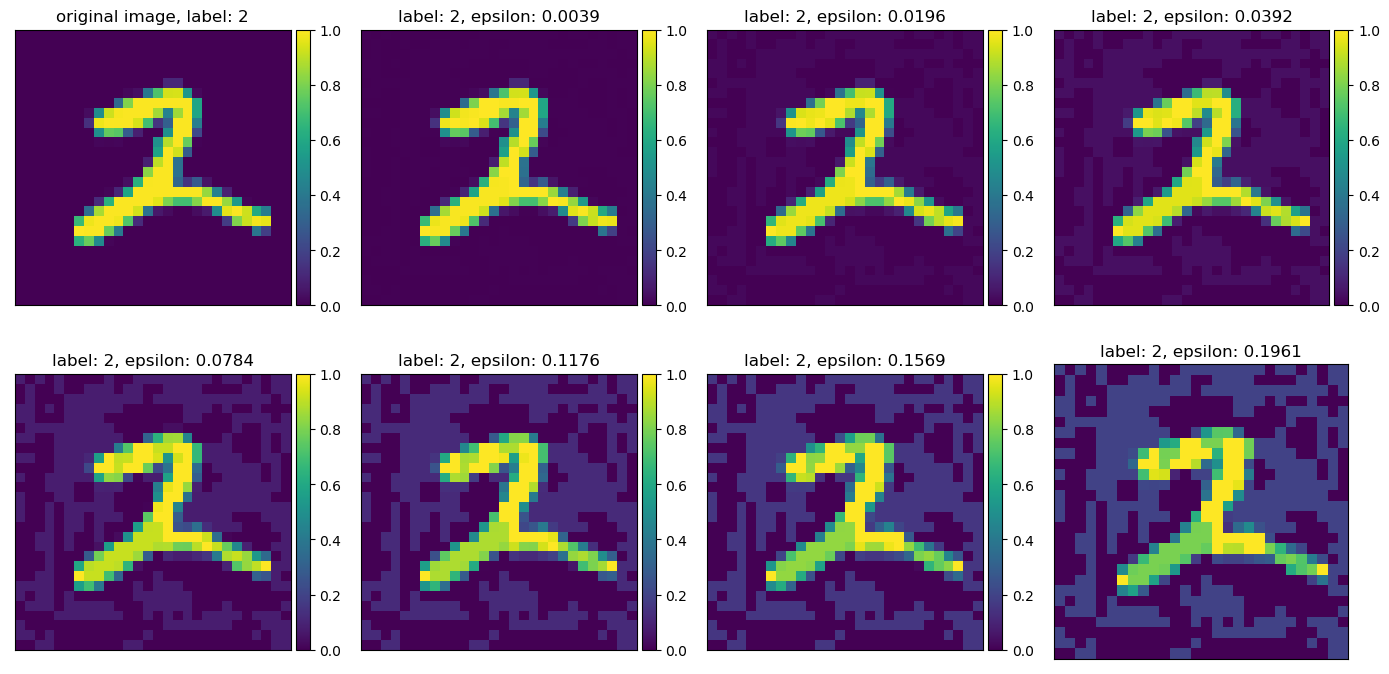

In [308]:
# visualize the changes in images based on the epsilon
epsilonArray = np.array([1., 5., 10., 20., 30., 40., 50.])/255.

idx=randIdx[0]
# let the first image be original
modifiedImagesArrayUntargeted = [x_test[idx]]


for k in range(epsilonArray.shape[0]):
    epsilon = epsilonArray[k]
    # modify images
    x_test_modified_tmp = np.clip(x_test[idx]+epsilon*np.sign(lossGradientsTensor[idx,:,:]), 0.0, 1.0) 
    modifiedImagesArrayUntargeted.append(x_test_modified_tmp)

# plot
num = 8
np.random.seed(45)
randIdx = [np.random.randint(10000) for i in range(num)]
num_row = 2
num_col = 4# plot images
fig, axes = plt.subplots(num_row, num_col, figsize=(3.5*num_col,3.5*num_row))
for i in range(num):
    divider= make_axes_locatable(ax)
    ax = axes[i//num_col, i%num_col]
    im = ax.imshow(modifiedImagesArrayUntargeted[i])
    if i==0:
        ax.set_title('original image, label: {}'.format(y_test[idx]))
    else:
        ax.set_title('label: {}, epsilon: {:.4f}'.format(y_test[idx], epsilonArray[i-1]))
    ax.set_xticks([])
    ax.set_yticks([])
    cax = divider.append_axes('right', size='5%', pad=0.05)
    im.set_clim(0, 1)
    fig.colorbar(im, cax=cax, orientation='vertical')
plt.tight_layout()
plt.show()

In [305]:
# now perform an attack on x_test_modified_v1
model.evaluate(x_test_modified_v1,  y_test, verbose=2)

#compare with baseline
model.evaluate(x_test,  y_test, verbose=2);

313/313 - 0s - loss: 22.0634 - accuracy: 0.1090
313/313 - 0s - loss: 0.0900 - accuracy: 0.9786


In [235]:
# labels after classifying original images 
yhat = model.predict_classes(x_test)
# labels after classifying modified images
yhatPrime = model.predict_classes(x_test_modified_v1)
#the success rate of attack is the fraction of test images that were correctly classified by the baseline DNN 
#that are mis-classified after adversarial perturbation

# indices of images correctly classified by the baseline DNN
correctlyClassifiedBaselineIdx = np.where(yhat==y_test)[0]

# number of images correctly classified by the baseline DNN
numCorrectlyClassified = np.sum(yhat==y_test)

# number of images mis-classified after adversarial perturbation
numMisclassified = np.sum(yhatPrime[correctlyClassifiedBaselineIdx]!=y_test[correctlyClassifiedBaselineIdx])

#success rate of attack:
attackSR = numMisclassified/numCorrectlyClassified
print("The success rate of attack with epsilon {:.4f} is {:.4f}".format( epsilon, attackSR))

The success rate of attack with epsilon 0.0784 is 0.6693


In [273]:
# now perform these steps for all epsilons
x_test_tensor = tf.convert_to_tensor(x_test, dtype=tf.float32)
with tf.GradientTape() as g:
    g.watch(x_test_tensor)
    lossTensor = loss_fn(y_test, model(x_test_tensor))
    
# calculate gradients of loss function:
lossGradientsTensor = g.gradient(lossTensor, x_test_tensor)

# labels after classifying original images 
yhat = model.predict_classes(x_test)
    
epsilonArray = np.array([1., 5., 10., 20., 30., 40., 50.])/255.
untargetedAttackSrArray = np.zeros(epsilonArray.shape)
for k in range(epsilonArray.shape[0]):
    epsilon = epsilonArray[k]
    # modify images
    x_test_modified_v1 = np.zeros(x_test.shape)
    for i in range(x_test.shape[0]):
        x_test_modified_v1[i,:,:] = np.clip(x_test[i]+epsilon*np.sign(lossGradientsTensor[i,:,:]), 0.0, 1.0) 
    #perform attack with modified test set:

    # labels after classifying modified images
    yhatPrime = model.predict_classes(x_test_modified_v1)
    #the success rate of attack is the fraction of test images that were correctly classified by the baseline DNN 
    #that are mis-classified after adversarial perturbation

    # indices of images correctly classified by the baseline DNN
    correctlyClassifiedBaselineIdx = np.where(yhat==y_test)[0]

    # number of images correctly classified by the baseline DNN
    numCorrectlyClassified = np.sum(yhat==y_test)

    # number of images mis-classified after adversarial perturbation
    numMisclassified = np.sum(yhatPrime[correctlyClassifiedBaselineIdx]!=y_test[correctlyClassifiedBaselineIdx])

    #success rate of attack:
    attackSR = numMisclassified/numCorrectlyClassified
    print("The success rate of attack with epsilon {:.4f} is {:.4f}".format( epsilon, attackSR))
    untargetedAttackSrArray[k]=attackSR

The success rate of attack with epsilon 0.0039 is 0.0060
The success rate of attack with epsilon 0.0196 is 0.0501
The success rate of attack with epsilon 0.0392 is 0.1847
The success rate of attack with epsilon 0.0784 is 0.6693
The success rate of attack with epsilon 0.1176 is 0.8933
The success rate of attack with epsilon 0.1569 is 0.9515
The success rate of attack with epsilon 0.1961 is 0.9745


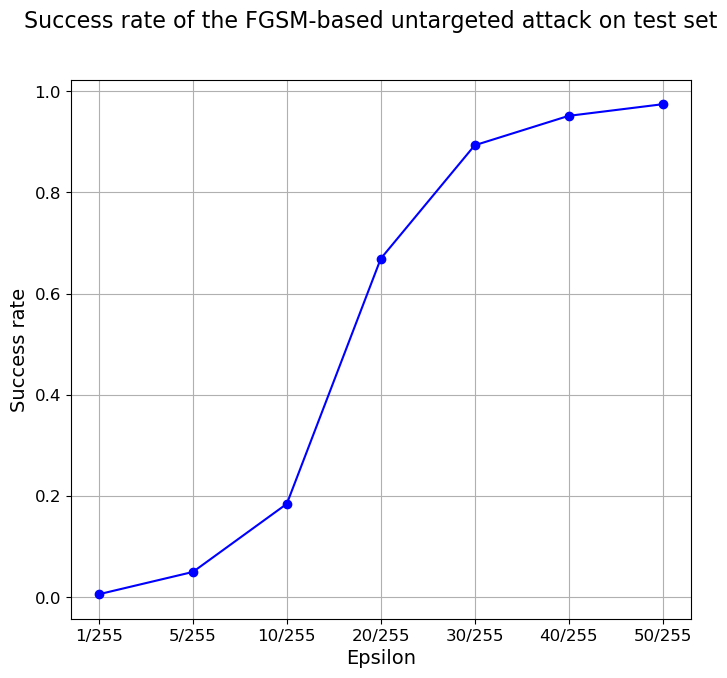

In [274]:
#plot
import matplotlib
matplotlib.rc_file_defaults()
fig, ax = plt.subplots(figsize=(8,7))
fig.suptitle("Success rate of the FGSM-based non-targeted attack on test set",fontsize="16")
ax.set_xticks(range(epsilonArray.shape[0]))
ax.set_xticklabels(['1/255', '5/255', '10/255', '20/255', '30/255', '40/255', '50/255'],fontsize="12")
ax.tick_params(axis="y", labelsize=12)
ax.set_ylabel('Success rate', fontsize="14")
ax.set_xlabel('Epsilon', fontsize="14")
ax.plot(untargetedAttackSrArray, 'bo-')
ax.grid()

In [241]:
epsilonArray.shape[0]

7

# FGSM based targeted attacks

Fast Gradient Sign Method allows the attacker to modify an image by taking a single step in the loss function gradient direction (for targeted attacks), taking into account the sign of the gradient:

$x' \leftarrow \text{clip}\left(x-\epsilon\text{sign}\left(\nabla l_{F,y'}(x)\right)\right)$

where $\epsilon$ is a small constraint value,$l$ is the lost function and $\text{clip}()$ function brings all the pixels of the image to the same range, e.g. from 0 to 255.

The attacker's goal is to increase the value of $l_{F,y'}(x)$, where $x$ image, $F$--network and $y'$ -- the label specified by the attacker, which is different of groung-truth label $y^*$. This is achieved by decreasing the loss $l_{F,y'}(x)$. He computes the sign of the gradient of loss function and makes a step opposite the gradient direction. The "length" of the step is controlled by $\epsilon$.

We will be applying the FGSM based targeted attack using images from the test set on the baseline DNN. 



In [255]:
################################################################################################################
# Using tf.GradientTape:
################################################################################################################

# loss function is loss_fn

#tf.GradientTape allows us to track TensorFlow computations and calculate gradients w.r.t. some given variables
#https://medium.com/analytics-vidhya/tf-gradienttape-explained-for-keras-users-cc3f06276f22
#https://www.tensorflow.org/api_docs/python/tf/GradientTape?hl=hu

x_test_tensor = tf.convert_to_tensor(x_test, dtype=tf.float32)

y_test_target = [(y+1)%10 for y in y_test]# targets set by attacker

with tf.GradientTape() as g:
    g.watch(x_test_tensor)
    lossTensor = loss_fn(y_test_target, model(x_test_tensor))
    
# calculate gradients of loss function:
lossGradientsTensor = g.gradient(lossTensor, x_test_tensor)

print(lossGradientsTensor.shape)

(10000, 28, 28)


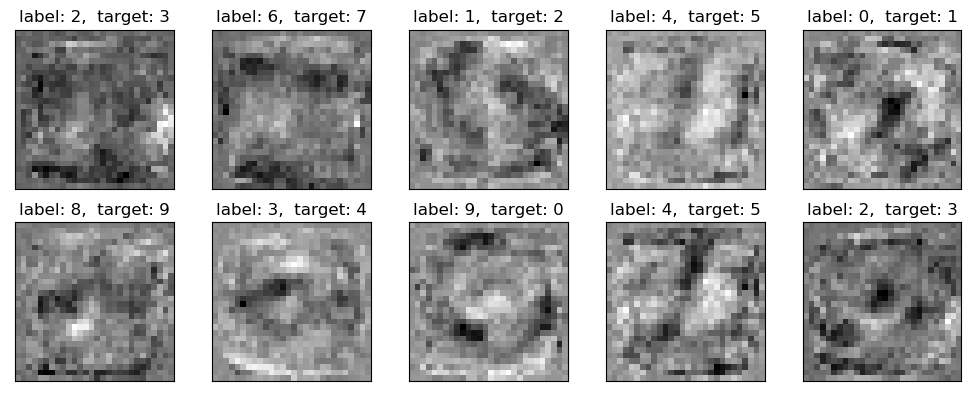

In [258]:
# plot image "gradients":
num = 10
np.random.seed(45)
randIdx = [np.random.randint(10000) for i in range(num)]
num_row = 2
num_col = 5# plot images
fig, axes = plt.subplots(num_row, num_col, figsize=(2*num_col,2*num_row))
for i in range(num):
    ax = axes[i//num_col, i%num_col]
    ax.imshow(lossGradientsTensor[randIdx[i]], cmap='gray')
    ax.set_title('label: {},  target: {}'.format(y_test[randIdx[i]],y_test_target[randIdx[i]]))
    ax.set_xticks([])
    ax.set_yticks([])
plt.tight_layout()
plt.show()

In [256]:
# create an array of 10000 modified test images
epsilon = 20/255
x_test_modified_v1 = np.zeros(x_test.shape)
for i in range(x_test.shape[0]):
    x_test_modified_v1[i,:,:] = np.clip(x_test[i]-epsilon*np.sign(lossGradientsTensor[i,:,:]), 0.0, 1.0) 

print(x_test_modified_v1.shape)


(10000, 28, 28)


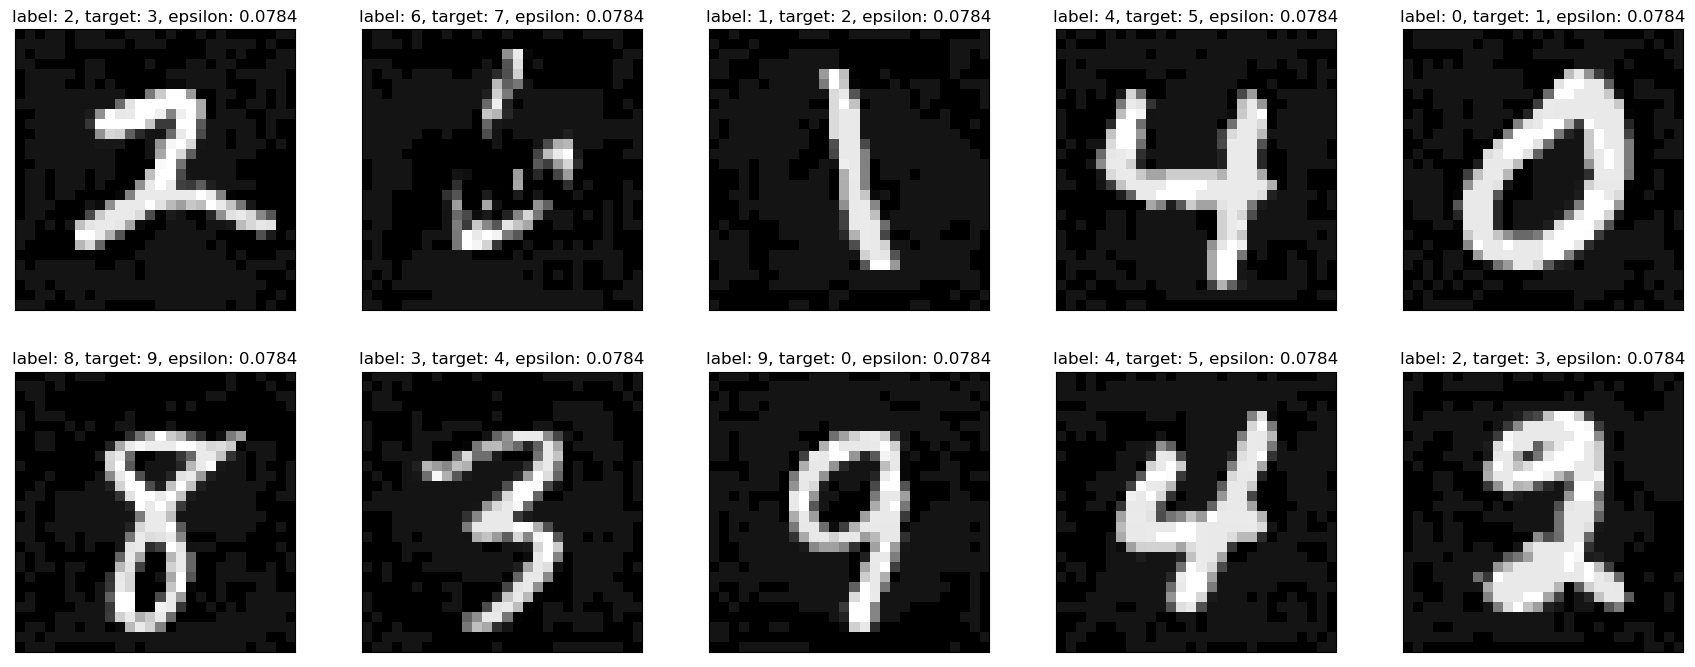

In [267]:
# plot
num = 10
np.random.seed(45)
randIdx = [np.random.randint(10000) for i in range(num)]
num_row = 2
num_col = 5# plot images
fig, axes = plt.subplots(num_row, num_col, figsize=(3.5*num_col,3.5*num_row))
for i in range(num):
    ax = axes[i//num_col, i%num_col]
    ax.imshow(x_test_modified_v1[randIdx[i]], cmap='gray')
    ax.set_title('label: {}, target: {}, epsilon: {:.4f}'.format(y_test[randIdx[i]],y_test_target[randIdx[i]], epsilon))
    ax.set_xticks([])
    ax.set_yticks([])
plt.tight_layout()
plt.show()

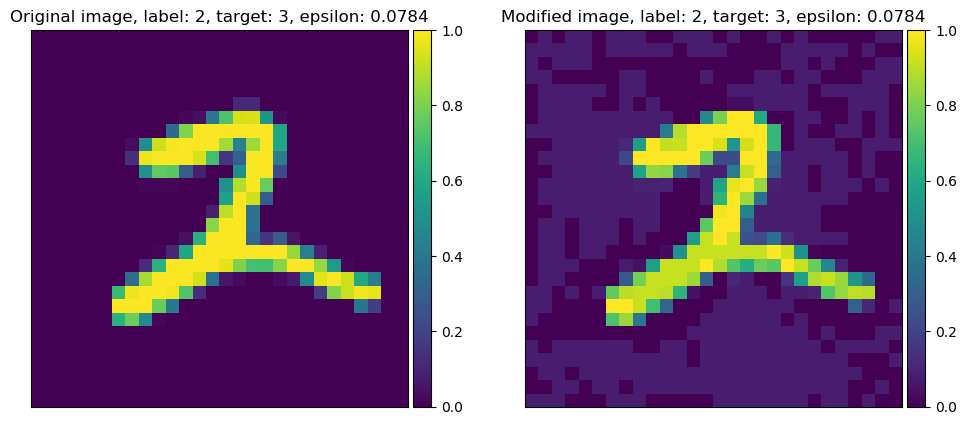

In [268]:
# plot randomly selected modified and original images side-by-side
from mpl_toolkits.axes_grid1 import make_axes_locatable

num = 10
np.random.seed(45)
randIdx = [np.random.randint(10000) for i in range(num)]
fig, axes = plt.subplots(1, 2, figsize=(10,20))
divider1 = make_axes_locatable(axes[0])
divider2 = make_axes_locatable(axes[1])
im1  =  axes[0].imshow(x_test[randIdx[0]])
im2  =  axes[1].imshow(x_test_modified_v1[randIdx[0]])
axes[0].set_title('Original image, label: {}, target: {}, epsilon: {:.4f}'.format(y_test[randIdx[0]],y_test_target[randIdx[i]], epsilon))
axes[1].set_title('Modified image, label: {}, target: {}, epsilon: {:.4f}'.format(y_test[randIdx[0]],y_test_target[randIdx[i]], epsilon))
axes[0].set_xticks([])
axes[0].set_yticks([])
axes[1].set_xticks([])
axes[1].set_yticks([])

cax1 = divider1.append_axes('right', size='5%', pad=0.05)
cax2 = divider2.append_axes('right', size='5%', pad=0.05)
im1.set_clim(0, 1)
im2.set_clim(0, 1)
fig.colorbar(im1, cax=cax1, orientation='vertical')
fig.colorbar(im2, cax=cax2, orientation='vertical')
plt.tight_layout()
plt.show()


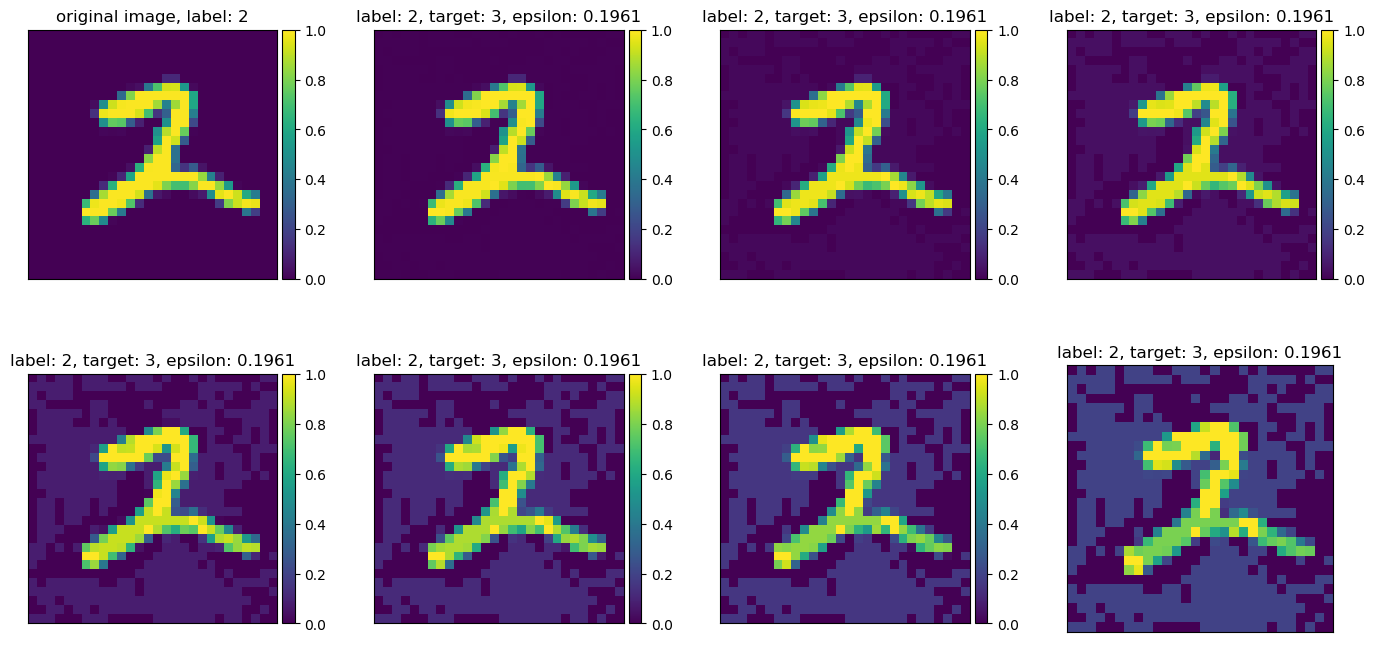

In [298]:
# visualize the changes in images based on the epsilon
epsilonArray = np.array([1., 5., 10., 20., 30., 40., 50.])/255.

idx=randIdx[0]
# let the first image be original
modifiedImagesArrayTargeted = [x_test[idx]]


for k in range(epsilonArray.shape[0]):
    epsilon = epsilonArray[k]
    # modify images
    x_test_modified_tmp = np.clip(x_test[idx]-epsilon*np.sign(lossGradientsTensor[idx,:,:]), 0.0, 1.0) 
    modifiedImagesArrayTargeted.append(x_test_modified_tmp)

# plot
num = 8
num_row = 2
num_col = 4# plot images
fig, axes = plt.subplots(num_row, num_col, figsize=(3.5*num_col,3.5*num_row))
for i in range(num):
    divider= make_axes_locatable(ax)
    ax = axes[i//num_col, i%num_col]
    im = ax.imshow(modifiedImagesArrayTargeted[i])
    if i==0:
        ax.set_title('original image, label: {}'.format(y_test[idx]))
    else:
        ax.set_title('label: {}, target: {}, epsilon: {:.4f}'.format(y_test[idx],y_test_target[idx], epsilonArray[i-1]))
    ax.set_xticks([])
    ax.set_yticks([])
    cax = divider.append_axes('right', size='5%', pad=0.05)
    im.set_clim(0, 1)
    fig.colorbar(im, cax=cax, orientation='vertical')
plt.tight_layout()
plt.show()

In [293]:
i

1

In [269]:
# now perform an attack on x_test_modified_v1
model.evaluate(x_test_modified_v1,  y_test, verbose=2)

#compare with baseline
model.evaluate(x_test,  y_test, verbose=2);

313/313 - 0s - loss: 1.4818 - accuracy: 0.5831
313/313 - 0s - loss: 0.0700 - accuracy: 0.9788


In [270]:
# labels after classifying original images 
yhat = model.predict_classes(x_test)
# labels after classifying modified images
yhatPrime = model.predict_classes(x_test_modified_v1)
#the success rate of attack is the fraction of test images that were correctly classified by the baseline DNN 
#that are mis-classified after adversarial perturbation

# indices of images correctly classified by the baseline DNN
correctlyClassifiedBaselineIdx = np.where(yhat==y_test)[0]

# number of images correctly classified by the baseline DNN
numCorrectlyClassified = np.sum(yhat==y_test)

# number of images mis-classified after adversarial perturbation
numMisclassified = np.sum(yhatPrime[correctlyClassifiedBaselineIdx]!=y_test[correctlyClassifiedBaselineIdx])

#success rate of attack:
attackSR = numMisclassified/numCorrectlyClassified
print("The success rate of attack with epsilon {:.4f} is {:.4f}".format( epsilon, attackSR))

The success rate of attack with epsilon 0.0784 is 0.4084


In [275]:
# now perform these steps for all epsilons
x_test_tensor = tf.convert_to_tensor(x_test, dtype=tf.float32)

# targets set by attacker
y_test_target = [(y+1)%10 for y in y_test]

with tf.GradientTape() as g:
    g.watch(x_test_tensor)
    lossTensor = loss_fn(y_test_target, model(x_test_tensor))
    
# calculate gradients of loss function:
lossGradientsTensor = g.gradient(lossTensor, x_test_tensor)

# labels after classifying original images 
yhat = model.predict_classes(x_test)
    
epsilonArray = np.array([1., 5., 10., 20., 30., 40., 50.])/255.
targetedAttackSrArray = np.zeros(epsilonArray.shape)
for k in range(epsilonArray.shape[0]):
    epsilon = epsilonArray[k]
    # modify images
    x_test_modified_v1 = np.zeros(x_test.shape)
    for i in range(x_test.shape[0]):
        x_test_modified_v1[i,:,:] = np.clip(x_test[i]-epsilon*np.sign(lossGradientsTensor[i,:,:]), 0.0, 1.0) 
    #perform attack with modified test set:

    # labels after classifying modified images
    yhatPrime = model.predict_classes(x_test_modified_v1)
    #the success rate of attack is the fraction of test images that were correctly classified by the baseline DNN 
    #that are mis-classified after adversarial perturbation

    # indices of images correctly classified by the baseline DNN
    correctlyClassifiedBaselineIdx = np.where(yhat==y_test)[0]

    # number of images correctly classified by the baseline DNN
    numCorrectlyClassified = np.sum(yhat==y_test)

    # number of images mis-classified after adversarial perturbation
    numMisclassified = np.sum(yhatPrime[correctlyClassifiedBaselineIdx]!=y_test[correctlyClassifiedBaselineIdx])

    #success rate of attack:
    attackSR = numMisclassified/numCorrectlyClassified
    print("The success rate of attack with epsilon {:.4f} is {:.4f}".format( epsilon, attackSR))
    targetedAttackSrArray[k]=attackSR

The success rate of attack with epsilon 0.0039 is 0.0005
The success rate of attack with epsilon 0.0196 is 0.0145
The success rate of attack with epsilon 0.0392 is 0.0676
The success rate of attack with epsilon 0.0784 is 0.4084
The success rate of attack with epsilon 0.1176 is 0.7385
The success rate of attack with epsilon 0.1569 is 0.9119
The success rate of attack with epsilon 0.1961 is 0.9765


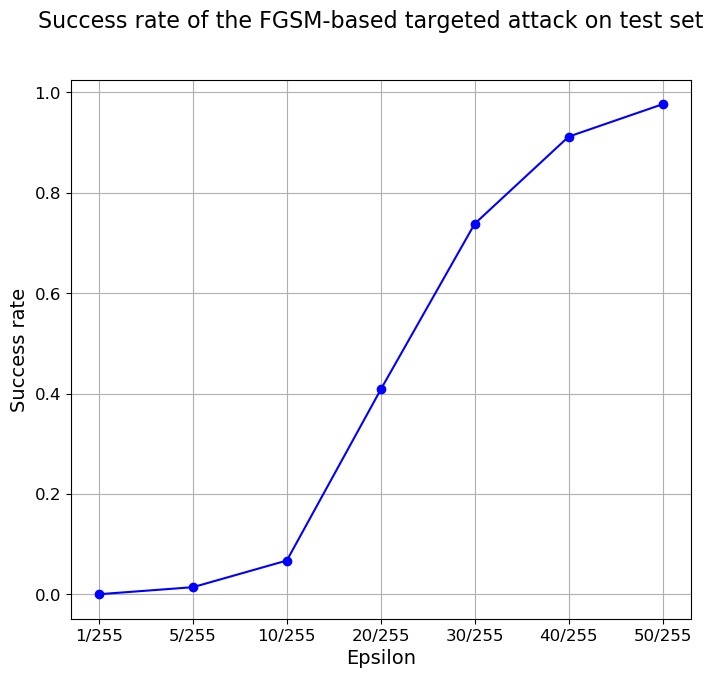

In [276]:
#plot
import matplotlib
matplotlib.rc_file_defaults()
fig, ax = plt.subplots(figsize=(8,7))
fig.suptitle("Success rate of the FGSM-based targeted attack on test set",fontsize="16")
ax.set_xticks(range(epsilonArray.shape[0]))
ax.set_xticklabels(['1/255', '5/255', '10/255', '20/255', '30/255', '40/255', '50/255'],fontsize="12")
ax.tick_params(axis="y", labelsize=12)
ax.set_ylabel('Success rate', fontsize="14")
ax.set_xlabel('Epsilon', fontsize="14")
ax.plot(attackSrArray, 'bo-')
ax.grid()

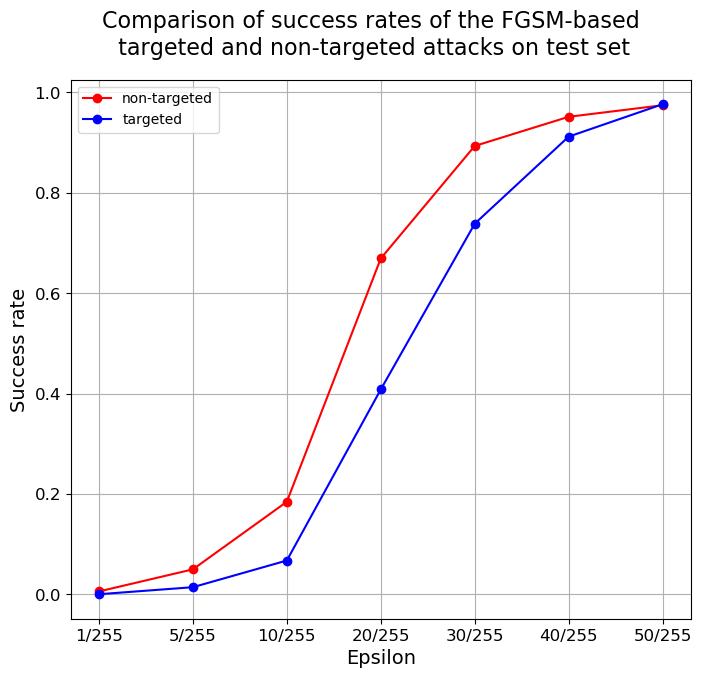

In [279]:
# compare targeted/untargeted attacks
#plot
import matplotlib
matplotlib.rc_file_defaults()
fig, ax = plt.subplots(figsize=(8,7))
fig.suptitle("Comparison of success rates of the FGSM-based\n targeted and non-targeted attacks on test set",fontsize="16")
ax.set_xticks(range(epsilonArray.shape[0]))
ax.set_xticklabels(['1/255', '5/255', '10/255', '20/255', '30/255', '40/255', '50/255'],fontsize="12")
ax.tick_params(axis="y", labelsize=12)
ax.set_ylabel('Success rate', fontsize="14")
ax.set_xlabel('Epsilon', fontsize="14")
ax.plot(untargetedAttackSrArray, 'ro-', label = 'non-targeted')
ax.plot(targetedAttackSrArray, 'bo-',label ='targeted')
ax.grid()
plt.legend()


# Adversarial Retraining against Untargeted FGSM Attacks


In [281]:
# first we adversarially perturb the train set and append it to the original training set
# 

#set the epsilon:
epsilon = 10/255


x_train_tensor = tf.convert_to_tensor(x_train, dtype=tf.float32)
with tf.GradientTape() as g:
    g.watch(x_train_tensor)
    lossTrainTensor = loss_fn(y_train, model(x_train_tensor))
    
# calculate gradients of loss function:
lossGradientsTrainTensor = g.gradient(lossTrainTensor, x_train_tensor)


# create an array of modified train images
x_train_modified_untargeted = np.zeros(x_train.shape)
for i in range(x_train.shape[0]):
    x_train_modified_untargeted[i,:,:] = np.clip(x_train[i]+epsilon*np.sign(lossGradientsTrainTensor[i,:,:]), 0.0, 1.0) 

# append
x_train_untargeted = np.vstack((x_train,x_train_modified_untargeted))
y_train_untargeted = np.hstack((y_train, y_train))
print(x_train_untargeted.shape)
print(y_train_untargeted.shape)    

In [287]:
# then we adversarially perturb the test set 
# 
x_test_tensor = tf.convert_to_tensor(x_test, dtype=tf.float32)
with tf.GradientTape() as g:
    g.watch(x_test_tensor)
    lossTestTensor = loss_fn(y_test, model(x_test_tensor))
    
# calculate gradients of loss function:
lossGradientsTestTensor = g.gradient(lossTensor, x_test_tensor)


# create an array of modified test images
x_test_modified_untargeted = np.zeros(x_test.shape)
for i in range(x_test.shape[0]):
    x_test_modified_untargeted[i,:,:] = np.clip(x_test[i]+epsilon*np.sign(lossGradientsTensor[i,:,:]), 0.0, 1.0) 

print(x_test_modified_untargeted.shape)

(10000, 28, 28)


In [288]:
modelUntargetedAdvRetrained = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(300, activation='relu'),
  #tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10)
])

modelUntargetedAdvRetrained.compile(optimizer='adam',
              loss=loss_fn,
              metrics=['accuracy'])

# train it on the training set obtained by combination the real and modified training images:
model.fit(x_train_untargeted, y_train_untargeted, epochs=5)


Epoch 1/5
3750/3750 [==============================] - 4s 1ms/step - loss: 0.0299 - accuracy: 0.9904
Epoch 2/5
3750/3750 [==============================] - 4s 1ms/step - loss: 0.0136 - accuracy: 0.9957
Epoch 3/5
3750/3750 [==============================] - 4s 1ms/step - loss: 0.0113 - accuracy: 0.9963
Epoch 4/5
3750/3750 [==============================] - 4s 1ms/step - loss: 0.0100 - accuracy: 0.9967
Epoch 5/5
3750/3750 [==============================] - 4s 1ms/step - loss: 0.0080 - accuracy: 0.9973


In [289]:
# evaluate on the test set containing original images:
res = model.evaluate(x_test,  y_test, verbose=2)


313/313 - 0s - loss: 0.0900 - accuracy: 0.9786


In [290]:
# evaluate on the test set containing adversarial images:
res = model.evaluate(x_test_modified_untargeted,  y_test, verbose=2)


313/313 - 0s - loss: 0.2318 - accuracy: 0.9444


In [291]:
# the success rate of the attack:
# labels after classifying original images 
yhat = model.predict_classes(x_test)
# labels after classifying modified images
yhatPrime = model.predict_classes(x_test_modified_untargeted)
#the success rate of attack is the fraction of test images that were correctly classified by the baseline DNN 
#that are mis-classified after adversarial perturbation

# indices of images correctly classified by the baseline DNN
correctlyClassifiedBaselineIdx = np.where(yhat==y_test)[0]

# number of images correctly classified by the baseline DNN
numCorrectlyClassified = np.sum(yhat==y_test)

# number of images mis-classified after adversarial perturbation
numMisclassified = np.sum(yhatPrime[correctlyClassifiedBaselineIdx]!=y_test[correctlyClassifiedBaselineIdx])

#success rate of attack:
attackSR = numMisclassified/numCorrectlyClassified
print("The success rate of attack with epsilon {:.4f} is {:.4f}".format( epsilon, attackSR))

The success rate of attack with epsilon 0.0392 is 0.0365


# Adversarial attack challenge

## PGD
In Projected Gradient Descent (PGD) a cost function is minimized subject to some constraint over many iterations. Any time we get a result that does not satisfy the constraint, i.e. falls down outside of the "physical space." Say in our case, the physical space isdefined as everything within interval $\delta$, i.e. $\|x-x'\|\leq \delta$. 

In our case $\|x-x'\|$ is the Root Mean Square Error (RMSE) averaged over all the images in the the original and modified datasets and  $\delta =5/255$. In PGD when we exceed the constraints we project the value back to the feasible region, i.e. to the point in the feasible region closest the newly-obtained point.

In [324]:
img1 = x_test[0].flatten()
img2 = x_test[1].flatten()
rmse = np.sqrt(((img1 - img2) ** 2).mean())
print(rmse)

0.40245770044187734


In [354]:

numIterations = 20
x_test_modified = x_test.copy() # we initialize the modified images with original images
epsilon = 1/255
C = 5/255
    
for iteration in range(numIterations):
    x_test_tensor = tf.convert_to_tensor(x_test_modified, dtype=tf.float32)
    with tf.GradientTape() as g:
        g.watch(x_test_tensor)
        lossTestTensor = loss_fn(y_test, model(x_test_tensor))
        
    # calculate gradients of loss function:   
    lossGradientsTensor = g.gradient(lossTestTensor, x_test_tensor)
    
    rmseArray = np.zeros((x_test.shape[0]))
    # recalculate constraints
    for i in range(x_test.shape[0]):
        img0 = x_test[i].flatten()
        img1 = x_test_modified[i].flatten()
        rmseArray[i] = np.sqrt(((img0 - img1) ** 2).mean())
        
    meanRmse = np.mean(rmseArray)
    
    if meanRmse > C:
        print("iteration: {:3d}, RMSE: {:.4f} is greater than {:.4f}, breaking...".format(iteration,meanRmse,C))
        break
    else:
        print("iteration: {:3d}, RMSE: {:.4f}, constraint: {:.4f}".format(iteration, meanRmse, C))
        # update an array of 10000 modified test images
        for i in range(x_test.shape[0]):
            x_test_modified[i] = np.clip(x_test_modified[i]+epsilon*np.sign(lossGradientsTensor[i]), 0.0, 1.0)

iteration: 0, RMSE: 0.0000, constraint: 0.0196
iteration: 1, RMSE: 0.0031, constraint: 0.0196
iteration: 2, RMSE: 0.0061, constraint: 0.0196
iteration: 3, RMSE: 0.0091, constraint: 0.0196
iteration: 4, RMSE: 0.0120, constraint: 0.0196
iteration: 5, RMSE: 0.0149, constraint: 0.0196
iteration: 6, RMSE: 0.0177, constraint: 0.0196
iteration: 7, RMSE: 0.0206 is greater than 0.0196, breaking...


In [356]:
rmseArray.shape

(10000,)

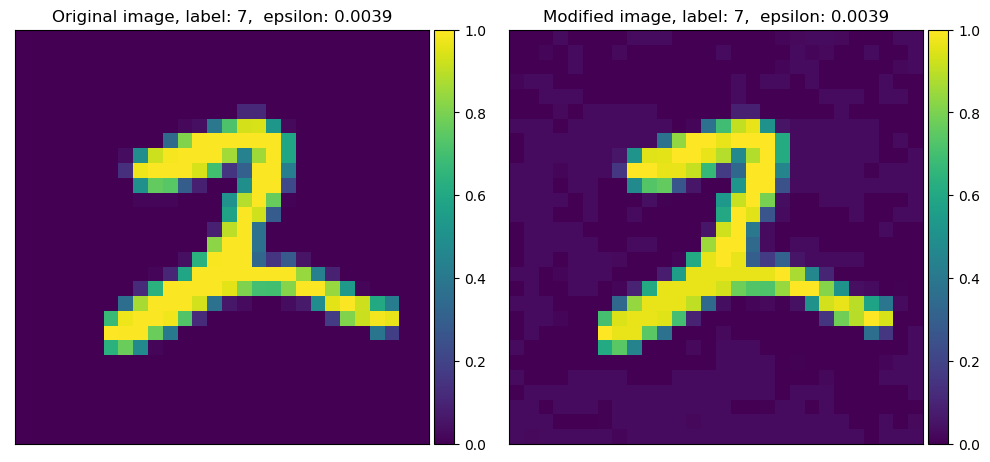

In [352]:
# plot randomly selected modified and original images side-by-side
from mpl_toolkits.axes_grid1 import make_axes_locatable

num = 10

fig, axes = plt.subplots(1, 2, figsize=(10,20))
divider1 = make_axes_locatable(axes[0])
divider2 = make_axes_locatable(axes[1])
im1  =  axes[0].imshow(x_test[randIdx[0]])
im2  =  axes[1].imshow(x_test_modified[randIdx[0]])
axes[0].set_title('Original image, label: {},  epsilon: {:.4f}'.format(y_test[randIdx[0]], epsilon))
axes[1].set_title('Modified image, label: {},  epsilon: {:.4f}'.format(y_test[randIdx[0]], epsilon))
axes[0].set_xticks([])
axes[0].set_yticks([])
axes[1].set_xticks([])
axes[1].set_yticks([])

cax1 = divider1.append_axes('right', size='5%', pad=0.05)
cax2 = divider2.append_axes('right', size='5%', pad=0.05)
im1.set_clim(0, 1)
im2.set_clim(0, 1)
fig.colorbar(im1, cax=cax1, orientation='vertical')
fig.colorbar(im2, cax=cax2, orientation='vertical')
plt.tight_layout()
plt.show()


In [412]:
## correct implementation:

numIterations = 100
x_test_modified = x_test.copy() # we initialize the modified images with original images
epsilon = 5/255
C = 5/255
alpha = epsilon/numIterations
delta = np.zeros(x_test_modified[0].shape)

for iteration in range(numIterations):
    x_test_tensor = tf.convert_to_tensor(x_test_modified, dtype=tf.float32)
    with tf.GradientTape() as g:
        g.watch(x_test_tensor)
        lossTestTensor = loss_fn(y_test, model(x_test_tensor))
        
    # calculate gradients of loss function:   
    lossGradientsTensor = g.gradient(lossTestTensor, x_test_tensor)
    
    rmseArray = np.zeros((x_test.shape[0]))
    # recalculate constraints
    for i in range(x_test.shape[0]):
        img0 = x_test[i].flatten()
        img1 = x_test_modified[i].flatten()
        rmseArray[i] = np.sqrt(((img0 - img1) ** 2).mean())
        
    meanRmse = np.mean(rmseArray)
    
    if meanRmse > C:
        print("iteration: {:3d}, RMSE: {:.4f} is greater than {:.4f}, breaking...".format(iteration,meanRmse,C))
        break
    else:
        print("iteration: {:3d}, RMSE: {:.4f}, constraint: {:.4f}".format(iteration, meanRmse, C))
        # update an array of 10000 modified test images
        delta = delta + alpha*np.sign(lossGradientsTensor[i])# take a step for some step size alpha
        delta = np.clip(delta,-epsilon, epsilon)# project delta into [-epsilon,epsilon]
        for i in range(x_test.shape[0]):
            x_test_modified[i] = np.clip(x_test_modified[i]+delta, 0.0, 1.0)

iteration:   0, RMSE: 0.0000, constraint: 0.0196
iteration:   1, RMSE: 0.0002, constraint: 0.0196
iteration:   2, RMSE: 0.0005, constraint: 0.0196
iteration:   3, RMSE: 0.0009, constraint: 0.0196
iteration:   4, RMSE: 0.0015, constraint: 0.0196
iteration:   5, RMSE: 0.0021, constraint: 0.0196
iteration:   6, RMSE: 0.0028, constraint: 0.0196
iteration:   7, RMSE: 0.0037, constraint: 0.0196
iteration:   8, RMSE: 0.0047, constraint: 0.0196
iteration:   9, RMSE: 0.0059, constraint: 0.0196
iteration:  10, RMSE: 0.0071, constraint: 0.0196
iteration:  11, RMSE: 0.0085, constraint: 0.0196
iteration:  12, RMSE: 0.0101, constraint: 0.0196
iteration:  13, RMSE: 0.0118, constraint: 0.0196
iteration:  14, RMSE: 0.0136, constraint: 0.0196
iteration:  15, RMSE: 0.0156, constraint: 0.0196
iteration:  16, RMSE: 0.0177, constraint: 0.0196
iteration:  17, RMSE: 0.0200 is greater than 0.0196, breaking...


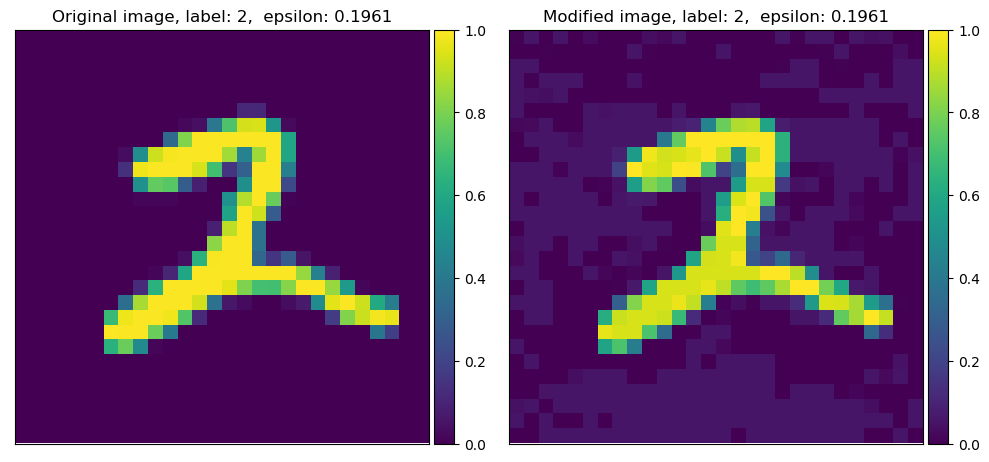

In [436]:
# plot randomly selected modified and original images side-by-side
from mpl_toolkits.axes_grid1 import make_axes_locatable

num = 10

fig, axes = plt.subplots(1, 2, figsize=(10,20))
divider1 = make_axes_locatable(axes[0])
divider2 = make_axes_locatable(axes[1])
im1  =  axes[0].imshow(x_test[randIdx[0]])
im2  =  axes[1].imshow(x_test_modified[randIdx[0]])
axes[0].set_title('Original image, label: {},  epsilon: {:.4f}'.format(y_test[randIdx[0]], epsilon))
axes[1].set_title('Modified image, label: {},  epsilon: {:.4f}'.format(y_test[randIdx[0]], epsilon))
axes[0].set_xticks([])
axes[0].set_yticks([])
axes[1].set_xticks([])
axes[1].set_yticks([])

cax1 = divider1.append_axes('right', size='5%', pad=0.05)
cax2 = divider2.append_axes('right', size='5%', pad=0.05)
im1.set_clim(0, 1)
im2.set_clim(0, 1)
fig.colorbar(im1, cax=cax1, orientation='vertical')
fig.colorbar(im2, cax=cax2, orientation='vertical')
plt.tight_layout()
plt.show()


In [414]:
# labels after classifying original images 
yhat = model.predict_classes(x_test)
# labels after classifying modified images
yhatPrime = model.predict_classes(x_test_modified)
#the success rate of attack is the fraction of test images that were correctly classified by the baseline DNN 
#that are mis-classified after adversarial perturbation

# indices of images correctly classified by the baseline DNN
correctlyClassifiedBaselineIdx = np.where(yhat==y_test)[0]

# number of images correctly classified by the baseline DNN
numCorrectlyClassified = np.sum(yhat==y_test)

# number of images mis-classified after adversarial perturbation
numMisclassified = np.sum(yhatPrime[correctlyClassifiedBaselineIdx]!=y_test[correctlyClassifiedBaselineIdx])

#success rate of attack:
attackSR = numMisclassified/numCorrectlyClassified
print("The success rate of attack with epsilon {:.4f} is {:.4f}".format( epsilon, attackSR))
#The success rate of attack with epsilon 0.0039 is 0.0095 # epsilon = 1/255

The success rate of attack with epsilon 0.0196 is 0.0081


##  IFGSM

For an untargeted attacks the adversary is seeking to produce an image $x'$ which is different from $x$ such that applying $\text{classifier}(x')$ to this image we obtain a label $y'$ which is different from the original label $y$, i.e. $y'=\text{classifier}(x')\neq y$. The modification to image $x$ should be imperceptable, i.e. less than some constrain $\delta$:

$\|x-x'\|<\delta$.

The larger the $\delta$ the more noticeable the modification is, but attackers's objective is achieved more easily, and vice versa -- smaller $\delta$ assumes less tolerance to the modification.

Iterative Fast Gradient Sign Method for an untargeted attack can be expressed as:

$x_0' = x$

$x_{N+1}' \leftarrow \text{clip_{\epsilon}}\left(x_{N}'+\alpha\text{sign}\left(\nabla l_{F,y^*}(x)\right)\right)$

where $x_{N}'$ -- modified image on $N$-th iteration, $x_{N+1}'$ -- on $N+1$-st, $\epsilon$ is a small constraint value, $\alpha = \frac{\epsilon}{N_{iter}}$, $N_{iter}$ -- number of iterations, $l$ is the lost function and $\text{clip_{epsilon}}()$ function brings all the pixels of the image to the same range, e.g. from 0 to 255.


In [435]:
# IFGSM
## https://github.com/as791/Adversarial-Example-Attack-and-Defense

# def ifgsm_attack(input,epsilon,data_grad):
#   iter = 10
#   alpha = epsilon/iter
#   pert_out = input
#   for i in range(iter-1):
#     pert_out = pert_out + alpha*data_grad.sign()
#     pert_out = torch.clamp(pert_out, 0, 1)
#     if torch.norm((pert_out-input),p=float('inf')) > epsilon:
#       break
#   return pert_out

from numpy import linalg as LA

numIterations = 250
x_test_modified = x_test.copy() # we initialize the modified images with original images
epsilon = 50/255
C = 5/255
alpha = epsilon/numIterations

for iteration in range(numIterations):
    x_test_tensor = tf.convert_to_tensor(x_test_modified, dtype=tf.float32)
    with tf.GradientTape() as g:
        g.watch(x_test_tensor)
        lossTestTensor = loss_fn(y_test, model(x_test_tensor))
        
    # calculate gradients of loss function:   
    lossGradientsTensor = g.gradient(lossTestTensor, x_test_tensor)
    
    rmseArray = np.zeros((x_test.shape[0]))
    # recalculate constraints
    for i in range(x_test.shape[0]):
        img0 = x_test[i].flatten()
        img1 = x_test_modified[i].flatten()
        rmseArray[i] = np.sqrt(((img0 - img1) ** 2).mean())
        
    meanRmse = np.mean(rmseArray)
    
    if meanRmse > C:
        print("iteration: {:3d}, RMSE: {:.4f} is greater than {:.4f}, breaking...".format(iteration,meanRmse,C))
        break
    else:
        print("iteration: {:3d}, RMSE: {:.4f}, constraint: {:.4f}".format(iteration, meanRmse, C))
        # update an array of 10000 modified test images
        for i in range(x_test.shape[0]):
            x_test_modified[i] = np.clip(x_test_modified[i]+alpha*np.sign(lossGradientsTensor[i]), 0.0, 1.0)
    if LA.norm((x_test.copy()-x_test_modified).ravel(), ord= np.inf) > epsilon:
        print("iteration: {:3d}, delta: {:.4f} is greater than epsilon: {:.4f}, breaking...".format(iteration,LA.norm((x_test.copy()-x_test_modified).ravel(), ord= np.inf),epsilon))



iteration:   0, RMSE: 0.0000, constraint: 0.0392
iteration:   1, RMSE: 0.0006, constraint: 0.0392
iteration:   2, RMSE: 0.0012, constraint: 0.0392
iteration:   3, RMSE: 0.0019, constraint: 0.0392
iteration:   4, RMSE: 0.0025, constraint: 0.0392
iteration:   5, RMSE: 0.0031, constraint: 0.0392
iteration:   6, RMSE: 0.0037, constraint: 0.0392
iteration:   7, RMSE: 0.0043, constraint: 0.0392
iteration:   8, RMSE: 0.0049, constraint: 0.0392
iteration:   9, RMSE: 0.0055, constraint: 0.0392
iteration:  10, RMSE: 0.0061, constraint: 0.0392
iteration:  11, RMSE: 0.0067, constraint: 0.0392
iteration:  12, RMSE: 0.0073, constraint: 0.0392
iteration:  13, RMSE: 0.0078, constraint: 0.0392
iteration:  14, RMSE: 0.0084, constraint: 0.0392
iteration:  15, RMSE: 0.0090, constraint: 0.0392
iteration:  16, RMSE: 0.0096, constraint: 0.0392
iteration:  17, RMSE: 0.0102, constraint: 0.0392
iteration:  18, RMSE: 0.0107, constraint: 0.0392
iteration:  19, RMSE: 0.0113, constraint: 0.0392
iteration:  20, RMSE

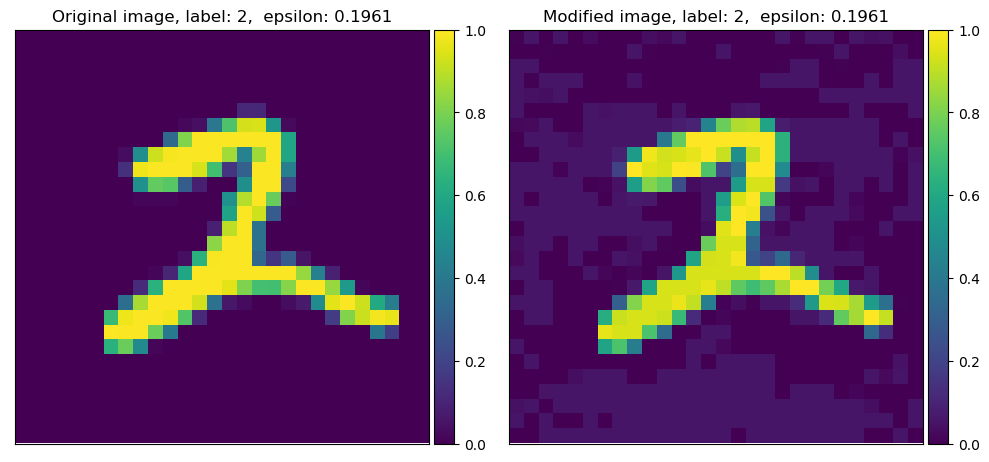

In [438]:
# plot randomly selected modified and original images side-by-side
from mpl_toolkits.axes_grid1 import make_axes_locatable

num = 10

fig, axes = plt.subplots(1, 2, figsize=(10,20))
divider1 = make_axes_locatable(axes[0])
divider2 = make_axes_locatable(axes[1])
im1  =  axes[0].imshow(x_test[randIdx[0]])
im2  =  axes[1].imshow(x_test_modified[randIdx[0]])
axes[0].set_title('Original image, label: {},  epsilon: {:.4f}'.format(y_test[randIdx[0]], epsilon))
axes[1].set_title('Modified image, label: {},  epsilon: {:.4f}'.format(y_test[randIdx[0]], epsilon))
axes[0].set_xticks([])
axes[0].set_yticks([])
axes[1].set_xticks([])
axes[1].set_yticks([])

cax1 = divider1.append_axes('right', size='5%', pad=0.05)
cax2 = divider2.append_axes('right', size='5%', pad=0.05)
im1.set_clim(0, 1)
im2.set_clim(0, 1)
fig.colorbar(im1, cax=cax1, orientation='vertical')
fig.colorbar(im2, cax=cax2, orientation='vertical')
plt.tight_layout()
plt.show()


In [439]:
# labels after classifying original images 
yhat = model.predict_classes(x_test)
# labels after classifying modified images
yhatPrime = model.predict_classes(x_test_modified)
#the success rate of attack is the fraction of test images that were correctly classified by the baseline DNN 
#that are mis-classified after adversarial perturbation

# indices of images correctly classified by the baseline DNN
correctlyClassifiedBaselineIdx = np.where(yhat==y_test)[0]

# number of images correctly classified by the baseline DNN
numCorrectlyClassified = np.sum(yhat==y_test)

# number of images mis-classified after adversarial perturbation
numMisclassified = np.sum(yhatPrime[correctlyClassifiedBaselineIdx]!=y_test[correctlyClassifiedBaselineIdx])

#success rate of attack:
attackSR = numMisclassified/numCorrectlyClassified
print("The success rate of attack with epsilon {:.4f} is {:.4f}".format( epsilon, attackSR))
#The success rate of attack with epsilon 0.0039 is 0.0095 # epsilon = 1/255

The success rate of attack with epsilon 0.1961 is 0.4553


In [440]:
# now perform these steps for all epsilons
x_test_tensor = tf.convert_to_tensor(x_test, dtype=tf.float32)

with tf.GradientTape() as g:
    g.watch(x_test_tensor)
    lossTensor = loss_fn(y_test_target, model(x_test_tensor))
    
# calculate gradients of loss function:
lossGradientsTensor = g.gradient(lossTensor, x_test_tensor)

# labels after classifying original images 
yhat = model.predict_classes(x_test)
C = 5/255  
numIterations = 250

epsilonArray = np.array([1., 5., 10., 20., 30., 40., 50.])/255.

ifgsmAttackSrArray = np.zeros(epsilonArray.shape)

for k in range(epsilonArray.shape[0]):
    epsilon = epsilonArray[k]
    print("performing IFGSM for epsilon {:.4f}, starting...".format(epsilon))
    x_test_modified = x_test.copy() # we initialize the modified images with original images

    alpha = epsilon/numIterations

    for iteration in range(numIterations):
        x_test_tensor = tf.convert_to_tensor(x_test_modified, dtype=tf.float32)
        with tf.GradientTape() as g:
            g.watch(x_test_tensor)
            lossTestTensor = loss_fn(y_test, model(x_test_tensor))

        # calculate gradients of loss function:   
        lossGradientsTensor = g.gradient(lossTestTensor, x_test_tensor)

        rmseArray = np.zeros((x_test.shape[0]))
        # recalculate constraints
        for i in range(x_test.shape[0]):
            img0 = x_test[i].flatten()
            img1 = x_test_modified[i].flatten()
            rmseArray[i] = np.sqrt(((img0 - img1) ** 2).mean())

        meanRmse = np.mean(rmseArray)

        if meanRmse > C:
            print("iteration: {:3d}, RMSE: {:.4f} is greater than {:.4f}, breaking...".format(iteration,meanRmse,C))
            break
        else:
            #print("iteration: {:3d}, RMSE: {:.4f}, constraint: {:.4f}".format(iteration, meanRmse, C))
            # update an array of 10000 modified test images
            for i in range(x_test.shape[0]):
                x_test_modified[i] = np.clip(x_test_modified[i]+alpha*np.sign(lossGradientsTensor[i]), 0.0, 1.0)
        if LA.norm((x_test.copy()-x_test_modified).ravel(), ord= np.inf) > epsilon:
            print("iteration: {:3d}, delta: {:.4f} is greater than epsilon: {:.4f}, breaking...".format(iteration,LA.norm((x_test.copy()-x_test_modified).ravel(), ord= np.inf),epsilon))

    # labels after classifying modified images
    yhatPrime = model.predict_classes(x_test_modified)
    #the success rate of attack is the fraction of test images that were correctly classified by the baseline DNN 
    #that are mis-classified after adversarial perturbation

    # indices of images correctly classified by the baseline DNN
    correctlyClassifiedBaselineIdx = np.where(yhat==y_test)[0]

    # number of images correctly classified by the baseline DNN
    numCorrectlyClassified = np.sum(yhat==y_test)

    # number of images mis-classified after adversarial perturbation
    numMisclassified = np.sum(yhatPrime[correctlyClassifiedBaselineIdx]!=y_test[correctlyClassifiedBaselineIdx])

    #success rate of attack:
    attackSR = numMisclassified/numCorrectlyClassified
    print("The success rate of attack with epsilon {:.4f} is {:.4f}".format( epsilon, attackSR))
    ifgsmAttackSrArray[k]=attackSR

performing IFGSM for epsilon 0.0039, starting...
iteration: 249, delta: 0.0039 is greater than epsilon: 0.0039, breaking...
The success rate of attack with epsilon 0.0039 is 0.0068
performing IFGSM for epsilon 0.0196, starting...
iteration: 249, delta: 0.0196 is greater than epsilon: 0.0196, breaking...
The success rate of attack with epsilon 0.0196 is 0.0542
performing IFGSM for epsilon 0.0392, starting...
iteration: 168, RMSE: 0.0196 is greater than 0.0196, breaking...
The success rate of attack with epsilon 0.0392 is 0.0927
performing IFGSM for epsilon 0.0784, starting...
iteration:  84, RMSE: 0.0196 is greater than 0.0196, breaking...
The success rate of attack with epsilon 0.0784 is 0.0927
performing IFGSM for epsilon 0.1176, starting...
iteration:  56, RMSE: 0.0196 is greater than 0.0196, breaking...
The success rate of attack with epsilon 0.1176 is 0.0927
performing IFGSM for epsilon 0.1569, starting...
iteration:  42, RMSE: 0.0196 is greater than 0.0196, breaking...
The success

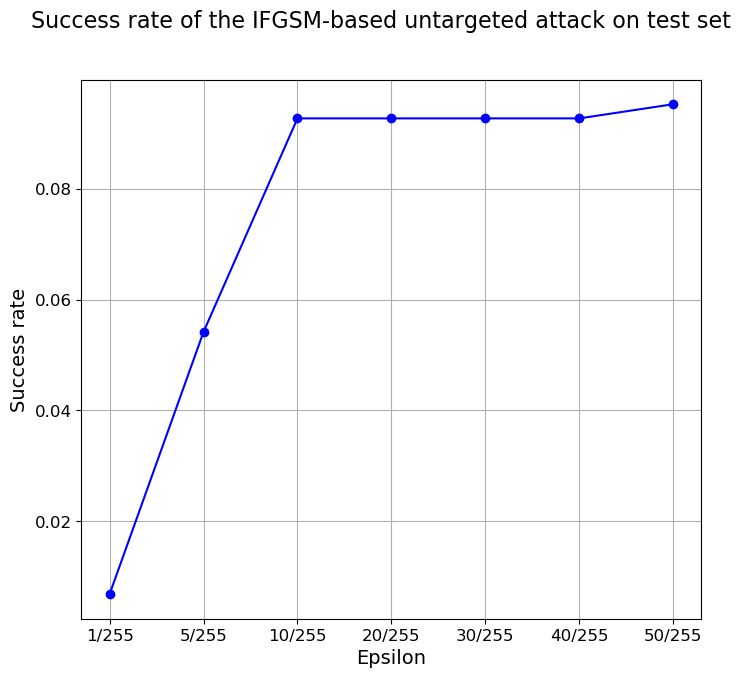

In [442]:
#plot
import matplotlib
matplotlib.rc_file_defaults()
fig, ax = plt.subplots(figsize=(8,7))
fig.suptitle("Success rate of the IFGSM-based untargeted attack on test set",fontsize="16")
ax.set_xticks(range(epsilonArray.shape[0]))
ax.set_xticklabels(['1/255', '5/255', '10/255', '20/255', '30/255', '40/255', '50/255'],fontsize="12")
ax.tick_params(axis="y", labelsize=12)
ax.set_ylabel('Success rate', fontsize="14")
ax.set_xlabel('Epsilon', fontsize="14")
ax.plot(ifgsmAttackSrArray, 'bo-')
ax.grid()